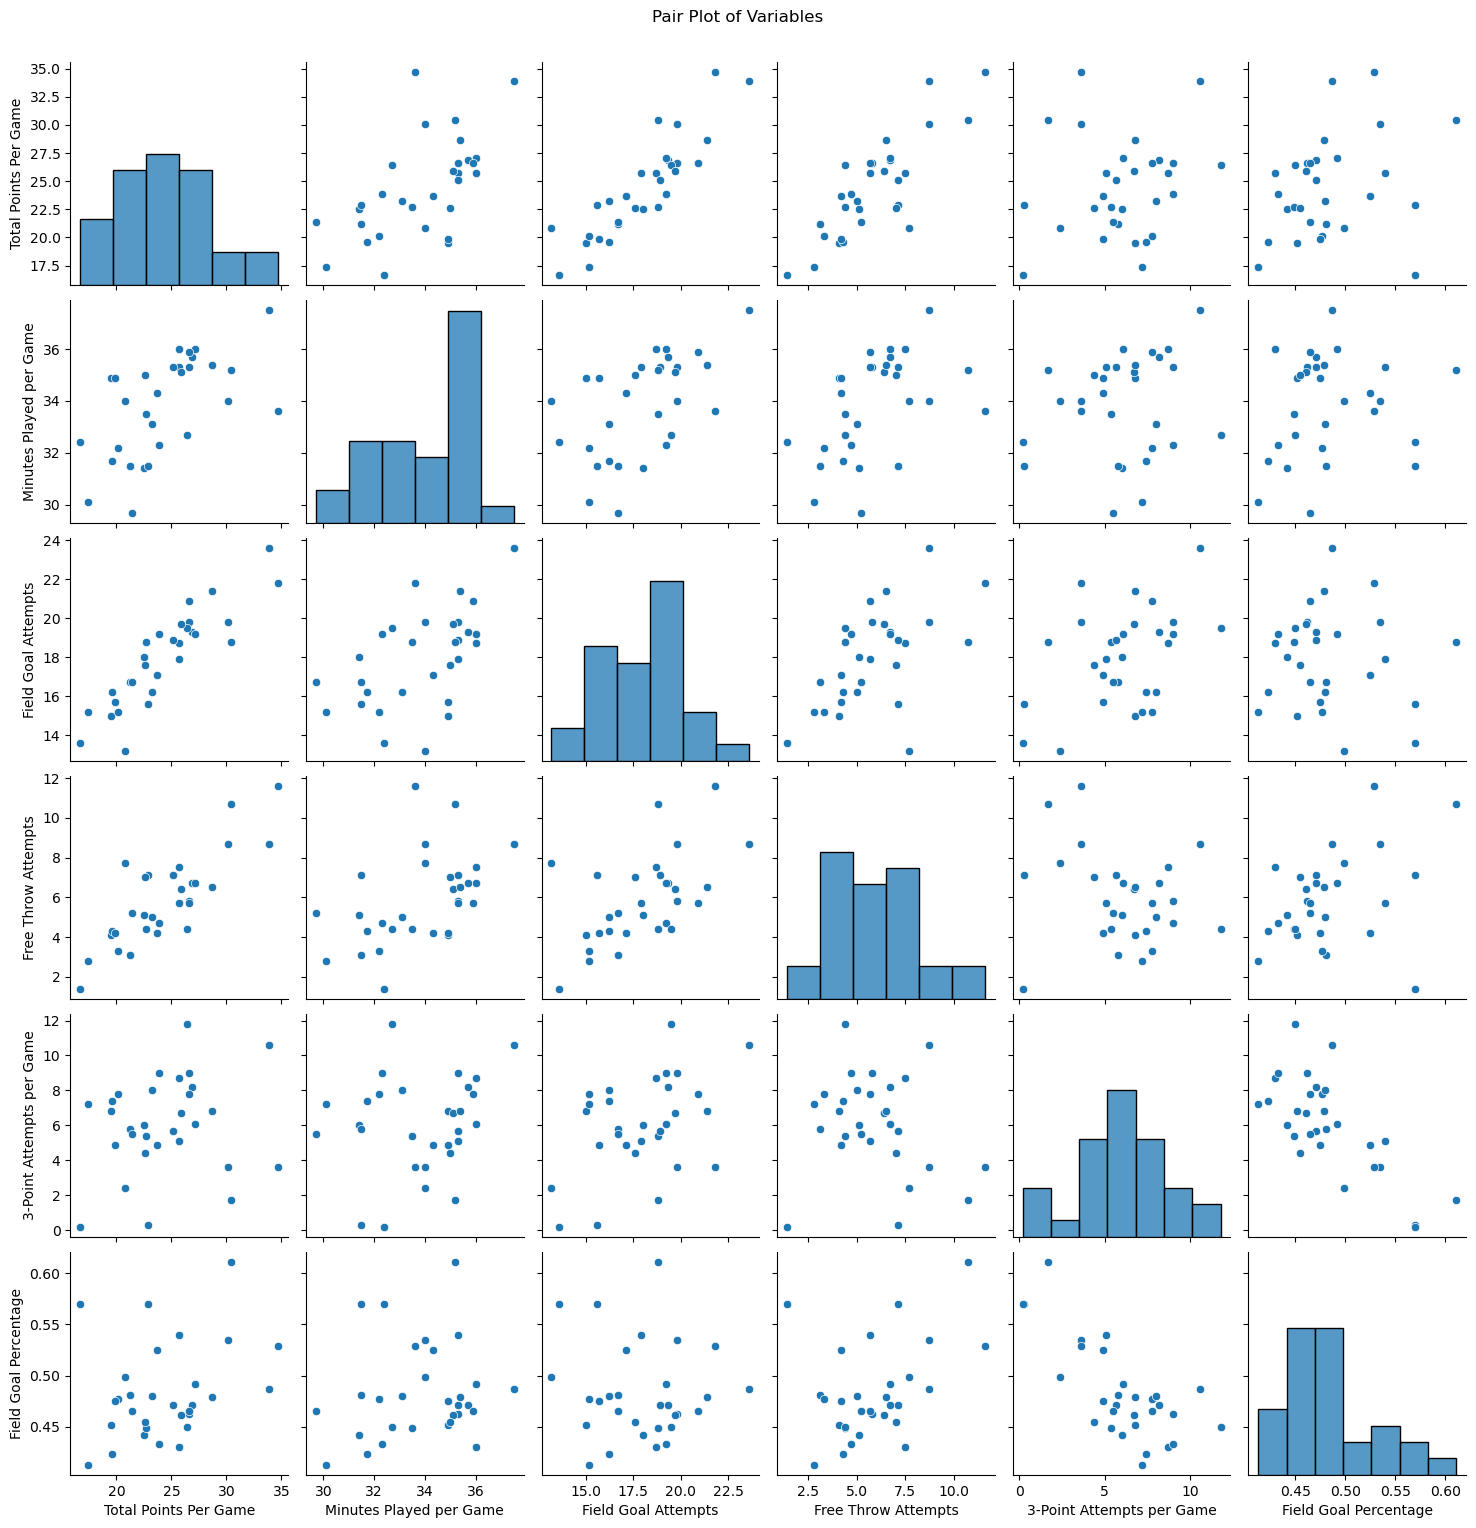

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (Ensure you have the correct file path)
file_path = 'NBA Players.xlsx'  # Replace this with your actual file path
nba_data = pd.read_excel(file_path)

# Clean up the data by renaming columns
nba_data_clean = nba_data.rename(columns={
    'Unnamed: 0': 'Player',
    'Y': 'Total Points Per Game',
    'X1': 'Minutes Played per Game',
    'X2': 'Field Goal Attempts',
    'X3': 'Free Throw Attempts',
    'X4': '3-Point Attempts per Game',
    'X5': 'Field Goal Percentage'
})

# Convert necessary columns to numeric
nba_data_clean = nba_data_clean.drop(0).reset_index(drop=True)
nba_data_clean[['Total Points Per Game', 'Minutes Played per Game', 
                'Field Goal Attempts', 'Free Throw Attempts', 
                '3-Point Attempts per Game', 'Field Goal Percentage']] = nba_data_clean[[
                    'Total Points Per Game', 'Minutes Played per Game', 
                    'Field Goal Attempts', 'Free Throw Attempts', 
                    '3-Point Attempts per Game', 'Field Goal Percentage'
                ]].apply(pd.to_numeric)

# Pair Plot
sns.pairplot(nba_data_clean[['Total Points Per Game', 'Minutes Played per Game', 
                             'Field Goal Attempts', 'Free Throw Attempts', 
                             '3-Point Attempts per Game', 'Field Goal Percentage']])
plt.suptitle("Pair Plot of Variables", y=1.02)
plt.show()


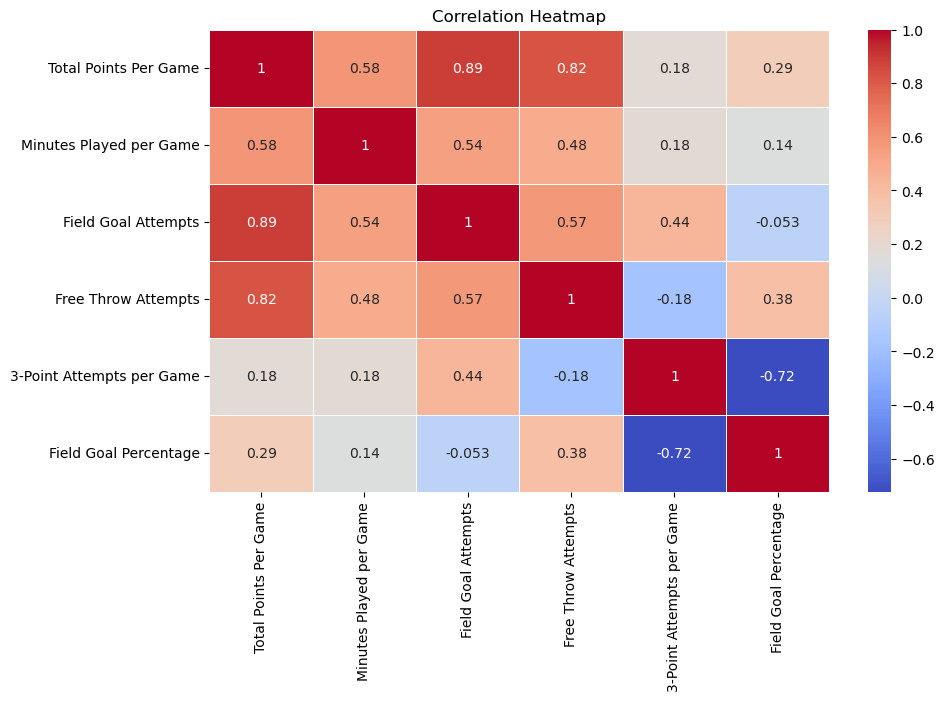

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = nba_data_clean[['Total Points Per Game', 'Minutes Played per Game', 
                              'Field Goal Attempts', 'Free Throw Attempts', 
                              '3-Point Attempts per Game', 'Field Goal Percentage']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


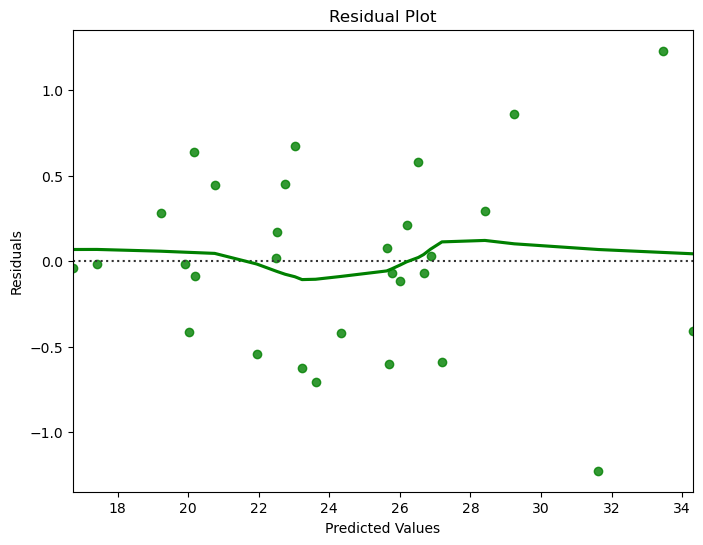

In [5]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the linear regression model
X = nba_data_clean[['Minutes Played per Game', 'Field Goal Attempts', 
                    'Free Throw Attempts', '3-Point Attempts per Game', 
                    'Field Goal Percentage']]
y = nba_data_clean['Total Points Per Game']
X = sm.add_constant(X)  # Add a constant for the intercept
model = sm.OLS(y, X).fit()

# Residual Plot
plt.figure(figsize=(8, 6))
predictions = model.predict(X)
residuals = y - predictions
sns.residplot(x=predictions, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


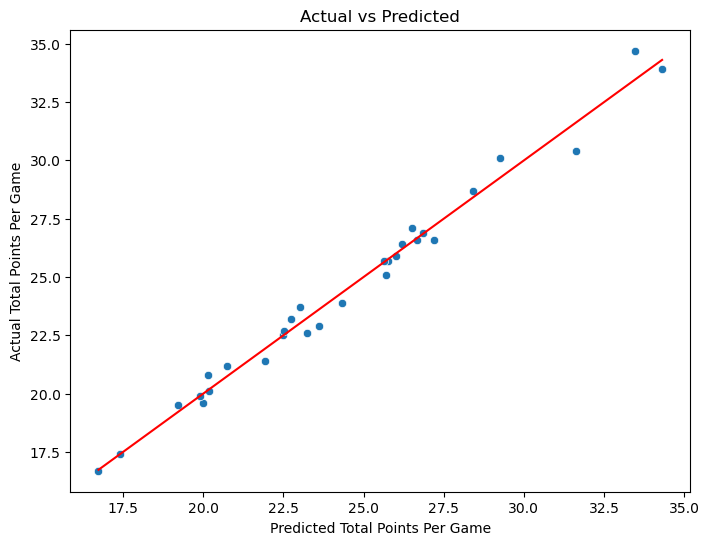

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=y)
plt.plot([min(predictions), max(predictions)], [min(predictions), max(predictions)], color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Total Points Per Game')
plt.ylabel('Actual Total Points Per Game')
plt.show()


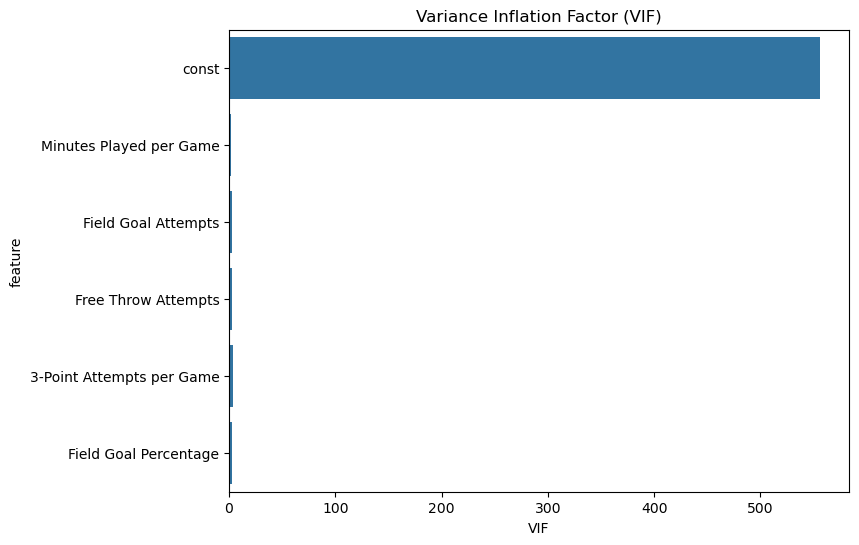

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Plot VIF values
plt.figure(figsize=(8, 6))
sns.barplot(x="VIF", y="feature", data=vif_data)
plt.title('Variance Inflation Factor (VIF)')
plt.show()


C:\Users\Angelo\AppData\Local\Temp\ipykernel_79092\1946131301.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Predictor", data=coef_df, palette='Set2')


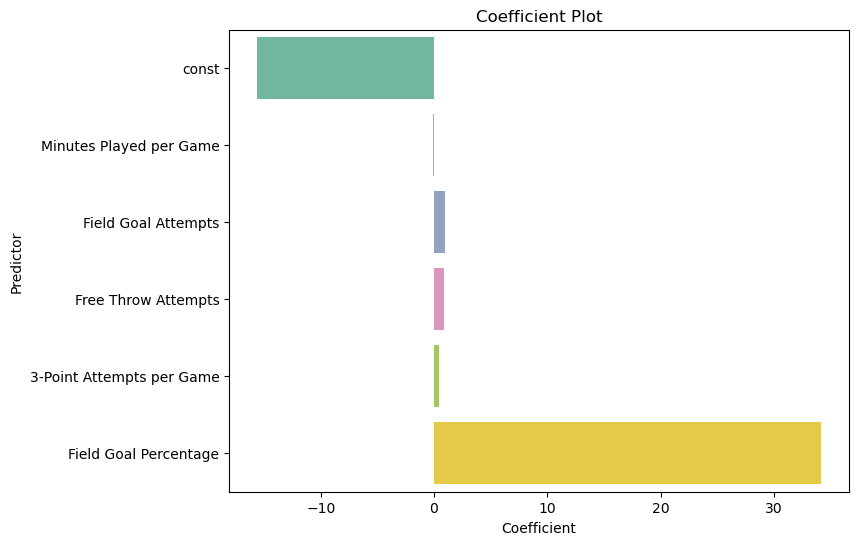

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'model' is already fitted and contains the regression coefficients
# Coefficients are stored in model.params

# Coefficient Plot
plt.figure(figsize=(8, 6))
coef_df = pd.DataFrame(model.params, columns=['Coefficient'])
coef_df = coef_df.reset_index().rename(columns={'index': 'Predictor'})

# Create the barplot with distinct colors
sns.barplot(x="Coefficient", y="Predictor", data=coef_df, palette='Set2')

plt.title('Coefficient Plot')
plt.show()


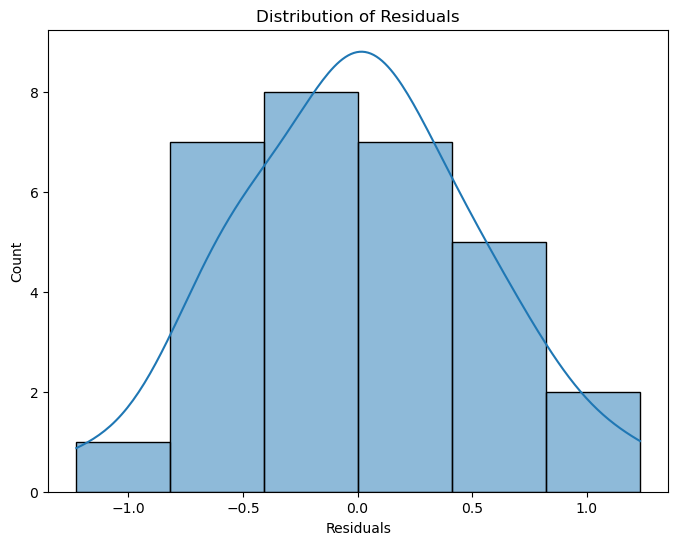

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


In [11]:
# Load the provided Excel file to access the data
file_path = 'NBA Players.xlsx'
nba_data = pd.read_excel(file_path)

# Inspect the first few rows of the data to identify relevant columns
nba_data.head()


,Unnamed: 0,Y,X1,X2,X3,X4,X5
0,Players,Total Points Per Game,Minutes Played per Game,Field Goal Attempts,Free Throw Attempts,3-Point Attempts per Game,Field Goal Percentage
1,Trae Young,25.7,36,18.7,7.5,8.7,0.43
2,Jayson Tatum,26.9,35.7,19.3,6.7,8.2,0.471
3,Cam Thomas,22.5,31.4,18,5.1,6,0.442
4,Lamelo Ball,23.9,32.3,19.2,4.7,9,0.433


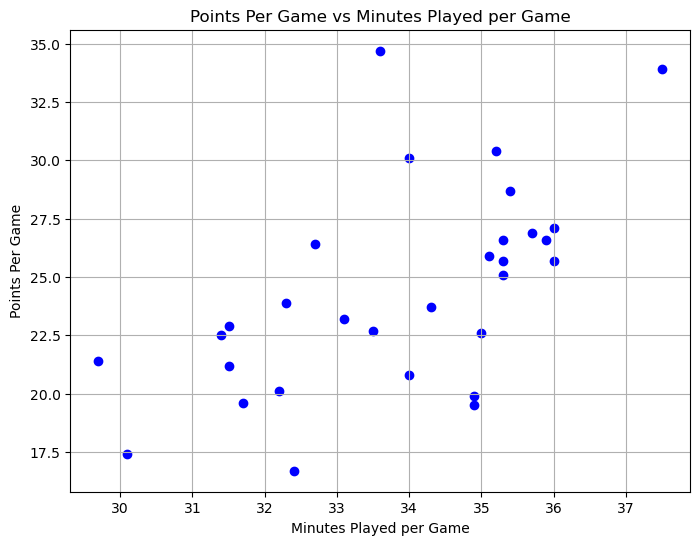

In [12]:
# Clean up the dataset by renaming relevant columns
nba_data_clean = nba_data.rename(columns={
    'Unnamed: 0': 'Player',
    'Y': 'Total Points Per Game',
    'X1': 'Minutes Played per Game'
})

# Drop the first row since it's just headers repeated in the data
nba_data_clean = nba_data_clean.drop(0).reset_index(drop=True)

# Convert the relevant columns to numeric values
nba_data_clean['Total Points Per Game'] = pd.to_numeric(nba_data_clean['Total Points Per Game'])
nba_data_clean['Minutes Played per Game'] = pd.to_numeric(nba_data_clean['Minutes Played per Game'])

# Generate a scatter plot for Points Per Game vs Minutes Played per Game
plt.figure(figsize=(8, 6))
plt.scatter(nba_data_clean['Minutes Played per Game'], nba_data_clean['Total Points Per Game'], color='blue')
plt.title('Points Per Game vs Minutes Played per Game')
plt.xlabel('Minutes Played per Game')
plt.ylabel('Points Per Game')
plt.grid(True)
plt.show()
